                 Price    short_ma     long_ma
Date                                          
2010-01-04   74.269768   74.269768   74.269768
2010-01-05   73.372612   73.806237   73.812218
2010-01-06   72.895981   73.482373   73.494510
2010-01-07   72.643616   73.251265   73.268856
2010-01-08   73.372612   73.278874   73.291300
...                ...         ...         ...
2019-12-24  101.587700  101.259564  101.573729
2019-12-26  101.535019  101.277335  101.572211
2019-12-27  101.805977  101.311441  101.581378
2019-12-30   99.954559  101.223901  101.517581
2019-12-31  100.880241  101.201729  101.492587

[2516 rows x 3 columns]


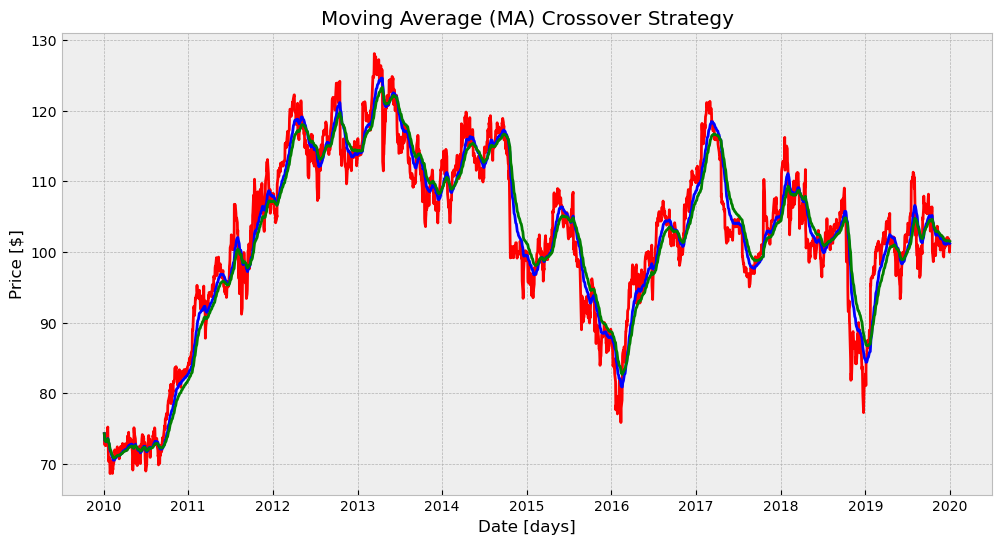

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

plt.style.use("bmh")

class MovingAverageCrossover:
    def __init__(self, capital, stock, start, end, short_period, long_period):
        self.data = None
        self.is_long = False
        self.short_period = short_period
        self.long_period = long_period
        self.capital = capital
        self.equity = [capital]
        self.stock = stock
        self.start = start
        self.end = end
        
    def download_data(self):
        # Download data directly into a DataFrame
        ticker_df = yf.download(self.stock, self.start, self.end, progress=False)
        
        # Extract just the Close price and keep Date as the index
        df = ticker_df[['Close']].copy()
        
        # Rename the column to Price
        df.columns = ['Price']
        
        self.data = df
        
    def __str__(self):
        if self.data is not None:
            return f"Strategy for {self.stock} with {len(self.data)} data points"
        return f"Strategy for {self.stock} (no data loaded yet)"
        
    def simulate(self):
        # we consider all the trading days and decide whether to open long position or not
        for index, row in self.data:
            
    def constuct_signal(self):
        self.data["short_ma"] = self.data["Price"].ewm(span=self.short_period).mean()
        self.data["long_ma"] = self.data["Price"].ewm(span=self.long_period).mean()
        print(self.data)
        
    def plot_signals(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.data["Price"], label='Stock Price', color='red')
        plt.plot(self.data["short_ma"], label='Stock Price', color='blue')
        plt.plot(self.data["long_ma"], label='Stock Price', color='green')
        plt.title('Moving Average (MA) Crossover Strategy')
        plt.xlabel('Date [days]')
        plt.ylabel('Price [$]')
        plt.show()
        

if __name__ == '__main__':
    start_date = datetime.datetime(2010, 1, 1)
    end_date = datetime.datetime(2020, 1, 1)
    strategy = MovingAverageCrossover(100, 'IBM', start_date, end_date, 30, 50)
    strategy.download_data()
    strategy.constuct_signal()
    strategy.plot_signals()

In [11]:
strategy.data

,Date,Price
0,2010-01-04,74.269768
1,2010-01-05,73.372612
2,2010-01-06,72.895981
3,2010-01-07,72.643616
4,2010-01-08,73.372612
...,...,...
2511,2019-12-24,101.587700
2512,2019-12-26,101.535019
2513,2019-12-27,101.805977
2514,2019-12-30,99.954559
